# Lab: Unsupervised Learning
## Principal Components Analysis

In this lab, we perform PCA on the `USArrests` data set.
The rows of the data set contain the 50 states, in alphabetical order.

In [124]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [5]:
USArrests = pd.read_csv('data/USArrests.csv', index_col=0)
USArrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


The columns of the data set contain the four variables.

We first briefly examine the data. We notice that the variables have vastly different means.

In [6]:
USArrests.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

We see that there are on average three times as many rapes as murders, and more than eight times as many assaults as rapes.
We can also examine the variances of the four variables.

In [7]:
USArrests.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

Not surprisingly, the variables also have vastly different variances:
 the `UrbanPop` variable measures the percentage of the population in each state living in an urban area, which is not a comparable number to the number of rapes
in each state per 100,000 individuals.
If we failed to scale the variables before performing PCA, then most of the principal components that we observed would be driven by the `Assault` variable, since it has by far the largest mean and variance.
Thus, it is important to standardize the variables to have mean zero and standard deviation one before performing PCA.

In [13]:
USArrests_scaled = pd.DataFrame(scale(USArrests),
                                columns=USArrests.columns,
                                index=USArrests.index)
USArrests_scaled.head()

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


We now perform principal components analysis using the `PCA()` function from `Scikit-Learn`.

In [20]:
pca = PCA().fit(USArrests_scaled)
X_pca = pca.fit_transform(USArrests_scaled)
USArrests_pca = pd.DataFrame(X_pca,
                             columns=['PC1', 'PC2', 'PC3', 'PC4'],
                             index=USArrests.index)

The output from
`PCA()` contains a number of useful quantities.

The `rotation` matrix is composed from the principal component loadings;
each column of the rotation matrix contains the corresponding
principal component loading vector. ( *It's called the rotation matrix, because when we matrix-multiply the $\bf X$   matrix by `rotation`, it gives us the coordinates of the   data in the rotated coordinate system. These coordinates are the  principal component scores.* )

In [23]:
rotation = pd.DataFrame(pca.components_.T,
                        index=USArrests.columns,
                        columns=['V1', 'V2', 'V3', 'V4'])
rotation

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


We see that there are four distinct principal components. This is to
be expected because there are in general $\min(n-1,p)$ informative
principal components in a data set with $n$ observations and $p$
variables.

Using the `PCA()` function, we do not need to explicitly multiply the data by the principal component loading vectors  in order to obtain the principal component score vectors. We can use the transform method to obtain the $50 \times 4$ matrix `x` that has as its columns the principal component score vectors. That is, the $k$th column is the $k$th principal component score vector.

In [25]:
X_pca = pca.fit_transform(USArrests_scaled)
USArrests_pca = pd.DataFrame(X_pca,
                             columns=['PC1', 'PC2', 'PC3', 'PC4'],
                             index=USArrests.index)
USArrests_pca

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285
Georgia,1.639283,1.278942,-0.342460,1.076797


We can plot the first two principal components as follows:

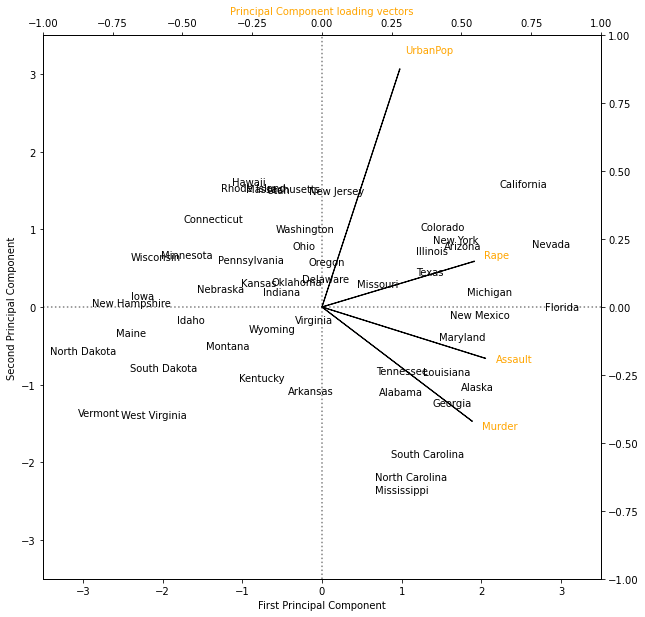

In [36]:
fig , ax = plt.subplots(figsize=(10, 10))

ax.set_xlim(-3.5,3.5)
ax.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i, row in USArrests_pca.iterrows():
    ax.annotate(i, (row.PC1, -row.PC2), ha='center')

# Plot reference lines
ax.axhline(0, linestyle='dotted', color='grey')
ax.axvline(0, linestyle='dotted', color='grey')

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax.twinx().twiny() 

ax2.set_ylim(-1, 1)
ax2.set_xlim(-1, 1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i, row in rotation.iterrows():
    ax2.annotate(i, (row.V1*a, -row.V2*a), color='orange')
    # Plot vectors
    ax2.arrow(0, 0, row.V1, -row.V2);

Notice that we multiplied the second principal component by -1. This is in order to reproduce Figure 12.1. Recall that the principal components are only unique up to a sign change.

The standard deviation of each principal component can be calculated from the explained variance attribute, as follows:

In [37]:
np.sqrt(pca.explained_variance_)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

The variance explained by each principal is the original attribute:

In [38]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

To compute the proportion of variance explained by each principal component, we simply divide the variance explained by each principal component by the total variance explained by all four principal components. This is already available as another attribute:

In [39]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

We see that the first principal component explains $62.0\,\%$ of the variance in the data, the next principal component explains $24.7\,\%$ of the variance, and so forth.
 We can plot the PVE explained by each component, as well as the cumulative PVE, as follows:

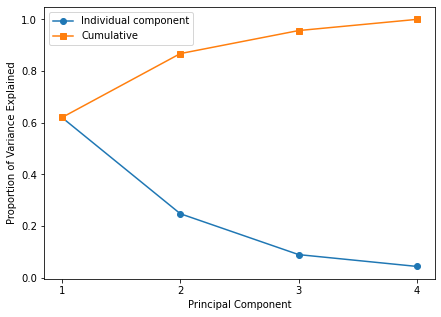

In [43]:
plt.figure(figsize=(7, 5))

plt.plot([1, 2, 3, 4], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1, 2, 3, 4], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xticks([1, 2, 3, 4])
plt.legend();

 The result is shown in Figure 12.3.
Note that the function `cumsum()` computes the cumulative sum of the elements of  a numeric vector.

## Matrix Completion 
We now re-create the analysis carried out on the _USArrests_ data in
Section 12.3. We turn the data frame into a
matrix, after centering and scaling each column to have mean zero and
variance one.

In [224]:
X = pd.DataFrame(scale(USArrests),
                 columns=USArrests.columns,
                 index=USArrests.index)
pca = PCA().fit(X)
X_pca = pca.transform(X)
print(pca.explained_variance_[:5])
print(pca.explained_variance_ratio_[:5])
print(np.cumsum(pca.explained_variance_ratio_)[:5])

[2.53085875 1.00996444 0.36383998 0.17696948]
[0.62006039 0.24744129 0.0891408  0.04335752]
[0.62006039 0.86750168 0.95664248 1.        ]


We see that the first principal component explains $62\%$ of the
variance. 

We saw in Section 12.2.2 that solving the optimization
problem (12.6)  on a centered data matrix $\bf X$ is
equivalent to computing the first $M$ principal
components of the data. The 
(SVD)  is a general algorithm for solving (12.6).

In [202]:
from numpy.linalg import svd

In [212]:
u, s, vh = svd(X, full_matrices=False)
v = vh.T
v

array([[-0.53589947,  0.41818087, -0.34123273,  0.6492278 ],
       [-0.58318363,  0.1879856 , -0.26814843, -0.74340748],
       [-0.27819087, -0.87280619, -0.37801579,  0.13387773],
       [-0.54343209, -0.16731864,  0.81777791,  0.08902432]])

The `svd()` function returns three components, `u`, `s`, and `vh`. The matrix `v` (the transpose of `vh`) is equivalent to the
loading matrix from principal components (up to an unimportant sign flip).

In [213]:
rotation = pca.components_.T
rotation

array([[ 0.53589947,  0.41818087, -0.34123273,  0.6492278 ],
       [ 0.58318363,  0.1879856 , -0.26814843, -0.74340748],
       [ 0.27819087, -0.87280619, -0.37801579,  0.13387773],
       [ 0.54343209, -0.16731864,  0.81777791,  0.08902432]])

The matrix `u` is equivalent to the matrix of *standardized*
scores, and the standard deviations are in the vector `s`. We can recover the score vectors using the output of `svd()`.
They are identical to the score vectors output by `prcomp()`.

In [217]:
(s * u)[:5, :4]

array([[-0.98556588,  1.13339238, -0.44426879,  0.15626714],
       [-1.95013775,  1.07321326,  2.04000333, -0.43858344],
       [-1.76316354, -0.74595678,  0.05478082, -0.83465292],
       [ 0.14142029,  1.11979678,  0.11457369, -0.1828109 ],
       [-2.52398013, -1.54293399,  0.5985568 , -0.34199648]])

In [218]:
X_pca[:5, :4]

array([[ 0.98556588,  1.13339238, -0.44426879,  0.15626714],
       [ 1.95013775,  1.07321326,  2.04000333, -0.43858344],
       [ 1.76316354, -0.74595678,  0.05478082, -0.83465292],
       [-0.14142029,  1.11979678,  0.11457369, -0.1828109 ],
       [ 2.52398013, -1.54293399,  0.5985568 , -0.34199648]])

While it would be possible to carry out this lab using the `PCA()` function,
here we use the `svd()` function in order to illustrate its use.

We now omit 20 entries in the $50\times 2$ data matrix at random. We do so
by first selecting 20 rows (states) at random, and then selecting one
of the four entries in each row at random. This ensures that every row has
at least three observed values.


In [235]:
nomit = 20
ina = prng.choice(range(50), nomit, replace=False)
inb = prng.choice(range(4), nomit, replace=True)
Xna = X.values.copy()
Xna[ina, inb] = np.nan

Here, `ina`
contains 20 integers from 1 to 50; this represents the states that are selected to contain missing values. And `inb` contains
20 integers from 1 to 4, representing the features that contain the missing values for each of the selected states.
To perform the final indexing, use the created arrays to index over rows and columns of the numpy array. We have indexed a matrix with arrays of indices!

We now write some code to implement
Algorithm 12.1.
We first write a  function that takes in a matrix, and returns an approximation to the matrix using the `svd()` function.
  This will be needed in Step 2 of Algorithm 12.1.  As mentioned earlier, we could do this using the `prcomp()` function, but instead we use the `svd()` function for illustration.

In [246]:
def fit_svd(X, M=1):
    u, s, vh = svd(X, full_matrices=False)
    return (s * u)[:, :M] @ vh[:M, :]

To conduct Step 1 of the algorithm, we initialize `Xhat` --- this is $\tilde{\bf X}$ in Algorithm 12.1 --- by replacing
the missing values with the column means of the non-missing entries.

In [283]:
Xhat = Xna.copy()
xbar = np.nanmean(Xna, axis=0)
Xhat[ina, inb] = xbar[inb]

Before we begin Step 2, we set ourselves up to measure the progress of our
iterations:

In [284]:
thresh = 1e-7
rel_err = 1
niter = 0

ismiss = np.isnan(Xna)

# Reconstructing value for mean imputation
mssold = np.mean((Xna - xbar)[~ismiss]**2)

# Reference error
mss0 = np.mean(Xna[~ismiss]**2)

Here  `ismiss` is a new logical matrix with the same dimensions as `Xna`; a given element equals `TRUE` if the corresponding matrix element is missing. This is useful
because it allows us to access both the missing and non-missing entries. We store the mean of the squared non-missing elements in `mss0`.
We store the mean squared error  of the non-missing elements  of the old version of `Xhat` in `mssold`. We plan to store the mean squared error of the non-missing elements of the current version of `Xhat` in `mss`, and will then  iterate Step 2 of Algorithm 12.1 until the *relative error*, defined as 

`(mssold - mss) / mss0`, falls below `thresh = 1e-7`. ( *Algorithm 12.1  tells us to iterate Step 2 until (12.14) is no longer decreasing. Determining whether (12.14)  is decreasing requires us only to keep track of `mssold - mss`. However, in practice, we keep track of `(mssold - mss) / mss0` instead: this makes it so that the number of iterations required for Algorithm 12.1 to converge does not depend on whether we multiplied the raw data $\bf X$ by a constant factor.* )

In Step 2(a) of Algorithm 12.1, we  approximate `Xhat` using `fit.svd()`; we call this `Xapp`.   In Step 2(b), we  use `Xapp`  to update the estimates for elements in `Xhat` that are missing in `Xna`. Finally, in Step 2(c), we compute the relative error. These three steps are contained in this `while()` loop:

In [285]:
while rel_err > thresh:
    niter += 1
    # Step 2(a)
    Xapp = fit_svd(Xhat, M=1)
    # Step 2(b)
    Xhat[ismiss] = Xapp[ismiss]
    # Step 2(c)
    mss = np.mean((Xna - Xapp)[~ismiss]**2)
    rel_err = (mssold - mss) / mss0
    mssold = mss
    print(f"Iter: {niter}, MSS: {mss}, Rel. Err:, {rel_err}")

Iter: 1, MSS: 0.4038800230148913, Rel. Err:, 0.5869944850552827
Iter: 2, MSS: 0.38771661430977356, Rel. Err:, 0.01629350842264218
Iter: 3, MSS: 0.3863802796988071, Rel. Err:, 0.0013470908046986326
Iter: 4, MSS: 0.38624774665764583, Rel. Err:, 0.00013359980322443258
Iter: 5, MSS: 0.3862319527067909, Rel. Err:, 1.5921076796147887e-05
Iter: 6, MSS: 0.38622975255387104, Rel. Err:, 2.217862010712257e-06
Iter: 7, MSS: 0.38622940667889577, Rel. Err:, 3.4865893238131024e-07
Iter: 8, MSS: 0.3862293468898983, Rel. Err:, 6.027024074658551e-08


We see that after eight iterations, the relative error has fallen below `thresh = 1e-7`, and so the algorithm terminates. When this happens, the mean squared error of the non-missing elements equals $0.386$.

Finally, we compute the correlation between the 20 imputed values
and the actual values:

In [293]:
np.corrcoef(Xapp[ismiss], X.values[ismiss])[0, 1]

0.7394012740751817

## Clustering

### $K$-Means Clustering

In [44]:
from sklearn.cluster import KMeans

The sklearn function `KMeans()` performs K-means clustering in Python. We begin with a simple simulated example in which there truly are two clusters in the data: the first 25 observations have a mean shift relative to the next 25 observations.

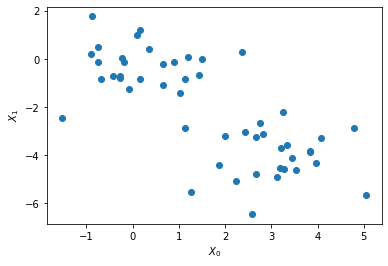

In [50]:
# Create the random number generator instance
prng = np.random.default_rng(seed=2)
X = prng.standard_normal((50, 2))
X[:25, 0] += 3
X[:25, 1] -= 4

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('$X_0$')
plt.ylabel('$X_1$');

We now perform $K$-means clustering with $K=2$.

In [60]:
km = KMeans(n_clusters=2, n_init=20, random_state=1).fit(X)

The cluster assignments of the 50 observations are contained in the `labels_` attribute.

In [61]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

The $K$-means clustering perfectly separated the observations into two clusters even though we did not supply any group information to `KMeans()`. We can plot the data, with each observation
colored according to its cluster assignment.

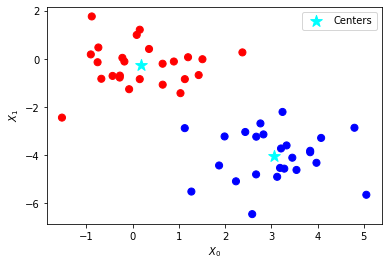

In [62]:
plt.scatter(X[:, 0], X[:, 1], s=50, c=km.labels_, cmap=plt.cm.bwr) 
plt.scatter(km.cluster_centers_[:, 0], 
            km.cluster_centers_[:, 1], 
            marker = '*', 
            s=150,
            color='cyan', 
            label='Centers')
plt.legend()
plt.xlabel('$X_0$')
plt.ylabel('$X_1$');

Here the observations can be easily plotted because they are two-dimensional. If there were more than two
variables then we could instead perform PCA and plot the first two principal components score vectors.

In this example, we knew that there really were two clusters because we generated the data. However, for real data, in general we do not
know the true number of clusters. We could instead have performed $K$-means clustering on this example with $K=3$.

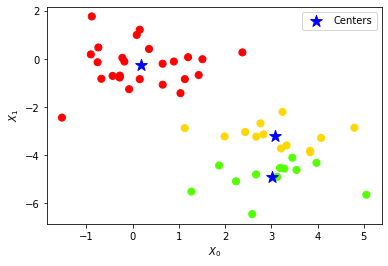

In [63]:
km_3 = KMeans(n_clusters=3, n_init=20, random_state=1).fit(X)

plt.scatter(X[:, 0], X[:, 1], s=50, c=km_3.labels_, cmap=plt.cm.prism) 
plt.scatter(km_3.cluster_centers_[:, 0], km_3.cluster_centers_[:, 1],
            marker='*', s=150,
            color='blue', label='Centers')
plt.legend()
plt.xlabel('$X_0$')
plt.ylabel('$X_1$');

When $K=3$, $K$-means clustering  splits up the two clusters.

To run the `KMeans()` function with multiple initial cluster assignments, we use the
`n_init` argument. If a value of `n_init` greater than one is used, then $K$-means clustering will be performed using
multiple random assignments in Step 1 of Algorithm 12.2, and the `KMeans()` function will report only the best results. Here we compare using `n_init=1` to `n_init=20`.

In [64]:
km = KMeans(n_clusters=3, n_init=1, random_state=2).fit(X)
print(km.inertia_)

km = KMeans(n_clusters=3, n_init=20, random_state=2).fit(X)
print(km.inertia_)

72.32821020261285
69.41902429507743


Note that `inertia_` is the total within-cluster sum of squares, which  we seek to minimize by performing $K$-means clustering (Equation 12.17).

We *strongly* recommend always running $K$-means clustering with
a large value of `n_init`, such as 20 or 50, since otherwise an
undesirable local optimum may be obtained.

When performing $K$-means clustering, in addition to using multiple initial cluster assignments, it is
also  important to set a random seed using the `random_state` argument. This way, the
initial cluster assignments in Step 1 can
be replicated, and the $K$-means output will be fully reproducible.

### Hierarchical Clustering

The `linkage()` function from Scipy implements  hierarchical clustering in `Python`. In the following example we use the data from the previous lab to
plot the hierarchical clustering dendrogram using complete, single, and average linkage clustering, with  Euclidean distance as the dissimilarity measure.
We begin by clustering observations using complete linkage. The `pdist()` function is used to compute the $50 \times 50$ inter-observation Euclidean distance matrix, though the original data matrix can also be used.

In [84]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist, squareform

In [69]:
D = pdist(X)
# D is a condensed distance matrix, the square form is shown next
squareform(D)

array([[0.        , 2.01097667, 2.31793219, ..., 5.70291037, 5.26524587,
        5.35303456],
       [2.01097667, 0.        , 4.21344527, ..., 7.07084877, 6.48548305,
        6.49976327],
       [2.31793219, 4.21344527, 0.        , ..., 5.80075004, 5.65986224,
        5.84328079],
       ...,
       [5.70291037, 7.07084877, 5.80075004, ..., 0.        , 0.77979065,
        0.98082715],
       [5.26524587, 6.48548305, 5.65986224, ..., 0.77979065, 0.        ,
        0.27043506],
       [5.35303456, 6.49976327, 5.84328079, ..., 0.98082715, 0.27043506,
        0.        ]])

In [79]:
hc_complete = linkage(X, "complete", optimal_ordering=True)

We could just as easily perform hierarchical clustering with average or single linkage instead:

In [71]:
hc_average = linkage(X, "average", optimal_ordering=True)
hc_single = linkage(X, "single", optimal_ordering=True)

We can now plot the dendrograms obtained using the usual `dendrogram()` function. The numbers at the bottom of the plot identify each observation.

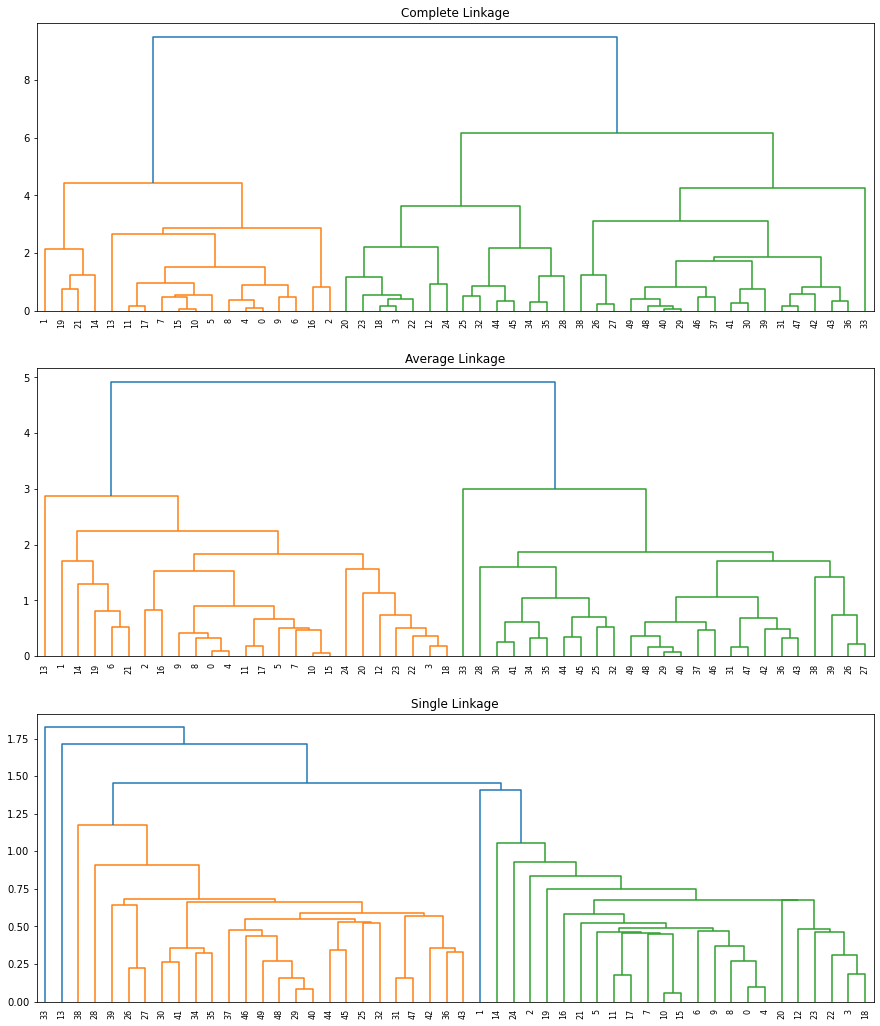

In [83]:
fig, ax = plt.subplots(3, 1, figsize=(15, 18))

ax[0].set_title('Complete Linkage')
dendrogram(hc_complete, ax=ax[0])

ax[1].set_title('Average Linkage')
dendrogram(hc_average, ax=ax[1])

ax[2].set_title('Single Linkage')
dendrogram(hc_single, ax=ax[2]);

To determine the cluster labels for each observation associated with a given cut of the dendrogram, we can use the `cut_tree()` function:

In [92]:
# We flatten the arreys for better visualization
# Cut_tree can output labales for different number of clusters as different columns
# Other option with more strategies to determine the number of clusters is the fcluster function
print(cut_tree(hc_complete, 2).ravel())
print(cut_tree(hc_average, 2).ravel())
print(cut_tree(hc_single, 2).ravel())

[0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


The second argument to `cutree()` is the number of clusters we wish to obtain.
For this data, complete and average linkage generally separate the observations into their correct groups. However, single linkage identifies one point as belonging to its own cluster. A more sensible answer is obtained when four clusters are selected, although there are still two singletons.

In [93]:
print(cut_tree(hc_single, 4).ravel())

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 3 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]


To scale the variables before performing hierarchical clustering of the observations, we use the `scale()` function:

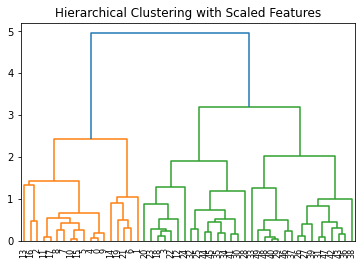

In [96]:
X_sc = scale(X)
hc_complete_sc = linkage(X_sc, "complete", optimal_ordering=True)

dendrogram(hc_complete_sc)
plt.title("Hierarchical Clustering with Scaled Features");

Correlation-based distance can be computed using the `metric` argument of the `pdist` function. However, this only makes sense for data with at least three features since the absolute correlation between any two observations
with measurements on two features is always 1. Hence, we will cluster a three-dimensional data set. This data set does not contain any true clusters.

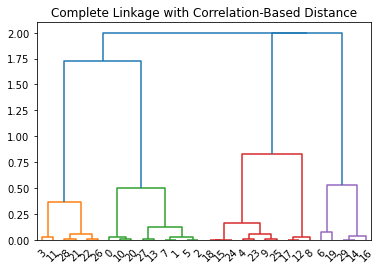

In [97]:
X = prng.standard_normal((30, 3))

D = pdist(X, metric='correlation')

# Notice now we are passing the distance matrix, not the data matrix
hc = linkage(D, "complete", optimal_ordering=True)
dendrogram(hc)
plt.title("Complete Linkage with Correlation-Based Distance");

## NCI60 Data Example

Unsupervised techniques are often used in the analysis of genomic data. In particular, PCA and hierarchical clustering are popular tools.
 We  illustrate these techniques on the `NCI` cancer cell line microarray data, which consists of $6{,}830$ gene expression measurements on $64$ cancer cell lines.

In [108]:
nci_data = pd.read_csv('data/NCI60_X.txt', index_col=0)
nci_data.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [107]:
nci_labs = pd.read_csv('data/NCI60_y.txt', index_col=0).rename(columns={'x': 'type'})
nci_labs.head()

,type
1,CNS
2,CNS
3,CNS
4,RENAL
5,BREAST


Each cell line is labeled with a cancer type, given in `nci_labs`. We do not make use of the cancer types in performing PCA and clustering, as these are unsupervised techniques. But
after performing PCA and clustering, we will
check to see the extent to which these cancer types agree with the results of these unsupervised techniques.

The data has $64$ rows and $6{,}830$ columns.

In [109]:
nci_data.shape

(64, 6830)

We begin by examining the cancer types for the cell lines.

In [111]:
nci_labs.value_counts().sort_index()

type       
BREAST         7
CNS            5
COLON          7
K562A-repro    1
K562B-repro    1
LEUKEMIA       6
MCF7A-repro    1
MCF7D-repro    1
MELANOMA       8
NSCLC          9
OVARIAN        6
PROSTATE       2
RENAL          9
UNKNOWN        1
dtype: int64

### PCA on the NCI60 Data

We first perform PCA on the data after scaling the variables (genes) to have standard deviation one, although one could reasonably argue that it is better not to scale the genes.

In [116]:
X = scale(nci_data)
pca = PCA().fit(X)
X_pca = pca.transform(X)

We now  plot the first few principal component score vectors, in order to visualize the data. The observations (cell lines) corresponding to a given cancer type will be plotted in the same color, so that we can see to what extent the observations within a cancer type are similar to each other.

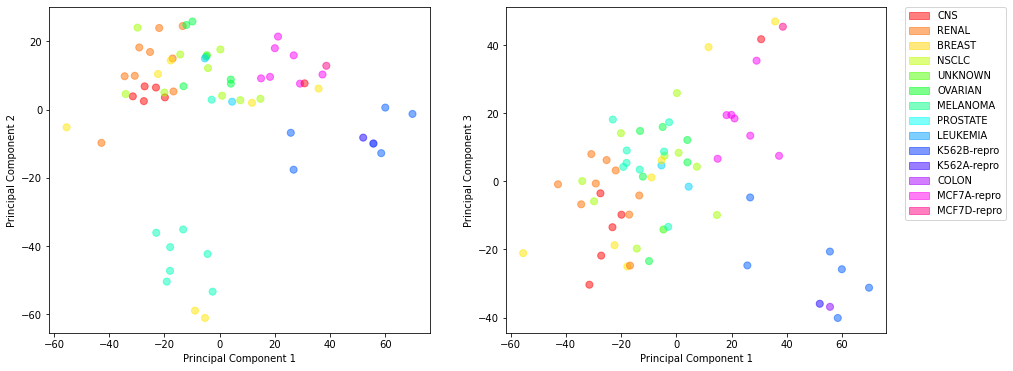

In [125]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

# Get types as integers
color_idx = pd.factorize(nci_labs.type)[0]
cmap = plt.cm.hsv

# Left plot
ax1.scatter(X_pca[:, 0], -X_pca[:, 1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2')

# Right plot
ax2.scatter(X_pca[:, 0], X_pca[:, 2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')

# Custom legend for the classes (y) since we do not create scatter plots per class (which could have their own labels).
handles = []
labels = pd.factorize(nci_labs.type.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)

for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))

ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# xlabel for both plots
for ax in fig.axes:
    ax.set_xlabel('Principal Component 1')

On the whole, cell lines corresponding to a single cancer type do tend to have similar values on the first few
principal component score vectors. This indicates that cell lines from the same cancer type tend to have pretty similar gene expression levels.

On the whole, observations belonging to a single cancer type tend to lie near each other
in this low-dimensional space. It would not have been possible to visualize the data without using a dimension reduction method such as PCA, since based on the full data set there are
$6{,}830 \choose 2$ possible scatterplots, none of which would have
been particularly informative.}

We can obtain a summary of the proportion of variance explained (PVE) of the first few principal components:

In [127]:
print(pca.explained_variance_[:5])
print(pca.explained_variance_ratio_[:5])
print(np.cumsum(pca.explained_variance_ratio_)[:5])

[788.13026426 468.77321436 399.08655196 294.71285936 259.1477961 ]
[0.11358942 0.06756203 0.05751842 0.04247554 0.03734972]
[0.11358942 0.18115144 0.23866987 0.28114541 0.31849513]


We can also plot the variance explained by the first few principal components.

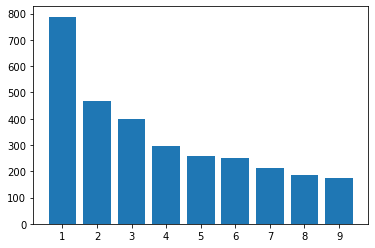

In [135]:
plt.bar(range(1, 10), pca.explained_variance_[:9])
plt.xticks(range(1, 10));

However, it is more informative to plot the PVE of each principal component (i.e. a scree plot) and the cumulative PVE of each principal component. This can be done with just a little work.

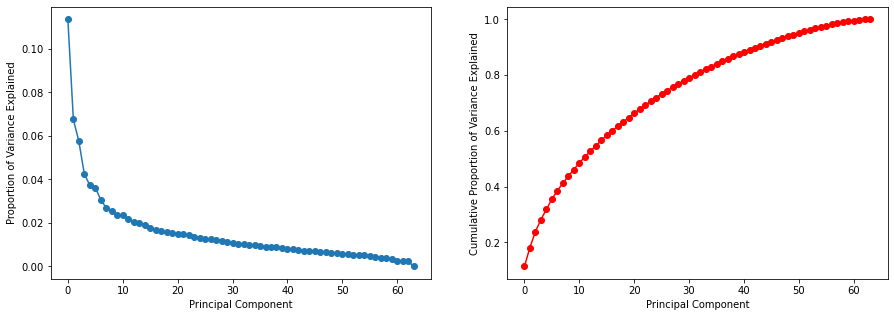

In [136]:
fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Left plot
ax1.plot(pca.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')

# Right plot
ax2.plot(np.cumsum(pca.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')

for ax in fig.axes:
    ax.set_xlabel('Principal Component')


We see that together,
the first seven principal components explain around $40\,\%$ of the variance in the data. This is not a huge
amount of the variance. However, looking at the scree plot, we see that while each of the first seven principal components explain a substantial amount of  variance, there
is a marked decrease in the variance explained by further principal components. That is, there is an *elbow*   in the plot after approximately the seventh principal component.
This suggests that there may be little benefit to examining more than seven or so principal components (though even examining seven principal components may be difficult).


### Clustering the Observations of the NCI60 Data

We now proceed to hierarchically cluster the cell lines in the `NCI` data, with the goal of finding out whether or not the observations cluster into distinct types of cancer. To begin, we standardize the variables to have mean
 zero and standard deviation one. As mentioned earlier, this step is optional and should be performed only if we want each gene to be on the same *scale*.

In [137]:
X = scale(nci_data)

We now perform hierarchical clustering of the observations using complete, single, and average linkage. Euclidean distance is used as the dissimilarity measure.

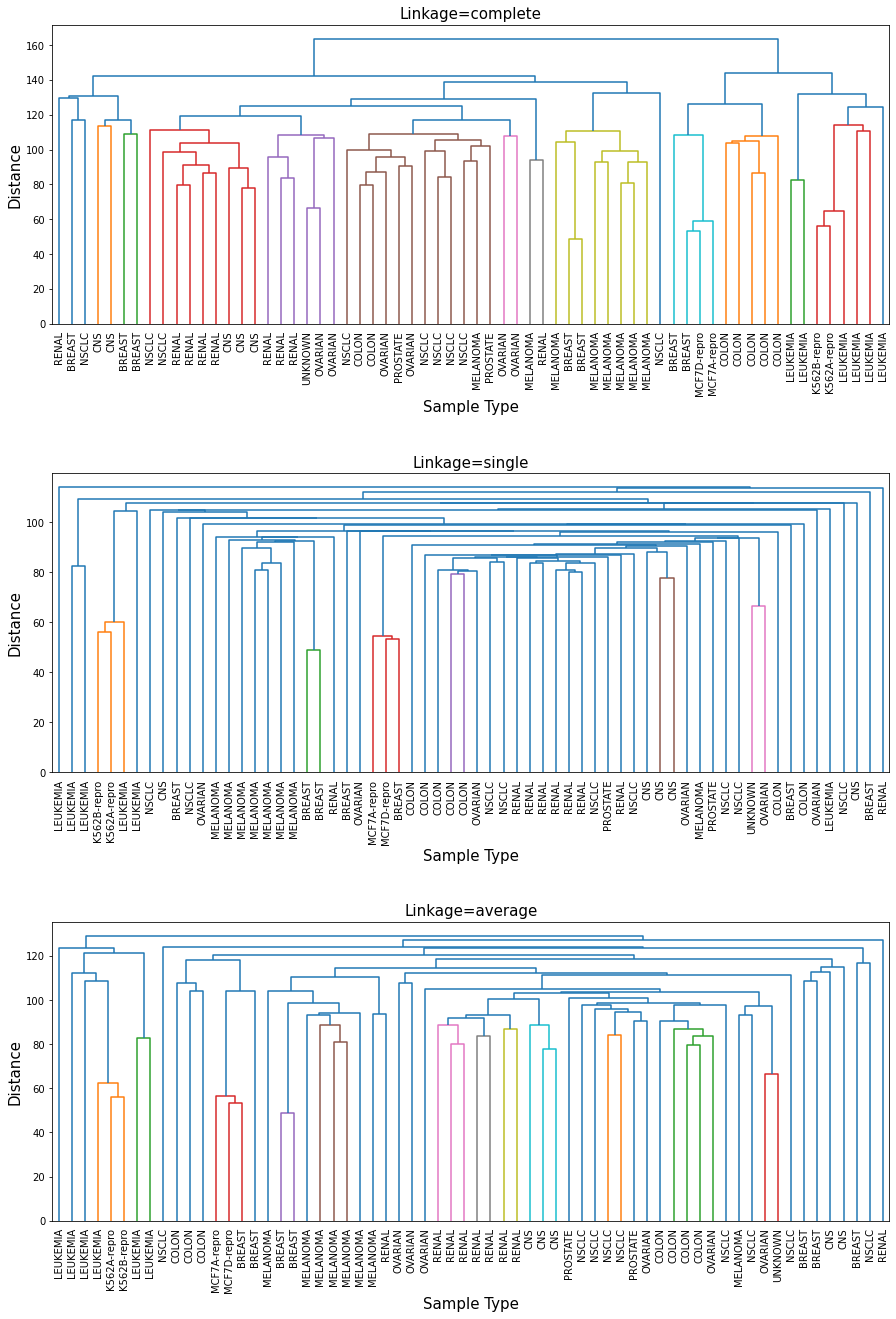

In [146]:
fig, ax = plt.subplots(3, 1, figsize=(15,22))
fig.subplots_adjust(hspace=0.5)
labels = nci_labs.values.ravel()

linkages = ['complete', 'single', 'average']
for link, axis in zip(linkages, fig.axes):
    hc = linkage(X, method=link, metric='euclidean', optimal_ordering=True) 
    axis.set_title("Linkage=%s" % link, size=15)
    axis.set_xlabel('Sample Type', size=15)
    axis.set_ylabel('Distance', size=15)
    dendrogram(hc, ax=axis, labels=labels, leaf_rotation=90, leaf_font_size=10)

Complete and average linkage tend to yield
evenly sized clusters whereas single linkage tends to yield extended clusters to which single leaves are fused one by one.

We see that the choice of linkage certainly  does affect the results obtained. Typically, single linkage will tend to yield *trailing* clusters: very large clusters onto which
individual observations attach  one-by-one. On the other hand, complete and average linkage tend to yield more balanced, attractive clusters. For this reason, complete
and average linkage are generally preferred to single linkage.
Clearly cell lines within a single cancer type do tend to cluster together, although the clustering is not perfect. We will use complete linkage hierarchical clustering for the analysis that follows.

We can cut the dendrogram at the height that will yield a particular number of clusters, say four:

In [161]:
nci_hc_complete = linkage(X, method="complete", metric='euclidean', optimal_ordering=True)
nci_hc_complete_4_clusters = cut_tree(nci_hc_complete, n_clusters=4)

pd.crosstab(index = labels, 
            columns = nci_hc_complete_4_clusters.ravel(), 
            rownames = ['Cancer Type'], 
            colnames = ['Cluster'])

Cluster,0,1,2,3
Cancer Type,,,,
BREAST,2,3,0,2
CNS,3,2,0,0
COLON,2,0,0,5
K562A-repro,0,0,1,0
K562B-repro,0,0,1,0
LEUKEMIA,0,0,6,0
MCF7A-repro,0,0,0,1
MCF7D-repro,0,0,0,1
MELANOMA,8,0,0,0


There are some clear patterns. All the leukemia cell lines fall in cluster $3$, while the breast cancer cell lines are spread out over three different clusters.  We can plot the cut on the dendrogram that produces these four clusters by adding an axhline(), which draws a horizontal line on top of our plot:

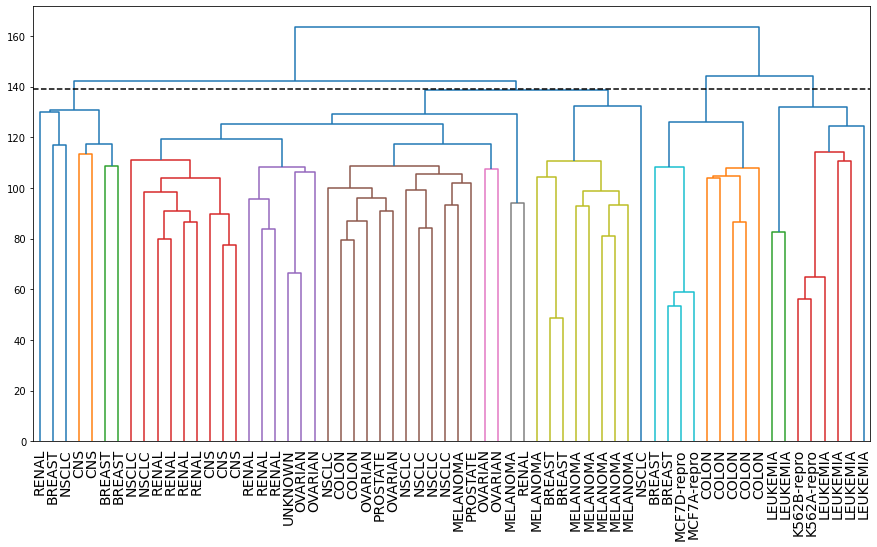

In [165]:
fig, ax = plt.subplots(1, 1, figsize = (15,8))
dendrogram(nci_hc_complete, 
           labels=labels, 
           leaf_font_size=14, 
           show_leaf_counts=True)  

plt.axhline(y=139, c='k', ls='dashed');

Height of $139$ on the height that results in four distinct clusters. It is easy to verify that the resulting clusters are the same as the ones we obtained using `cut_tree`.

We claimed earlier in Section 12.4.2 that $K$-means clustering and hierarchical clustering with the dendrogram cut to obtain the same number of clusters can yield very different results.
How do these `NCI` hierarchical clustering results compare to what we  get if we perform $K$-means clustering with $K=4$?

In [166]:
kmean_4 = KMeans(n_clusters=4, random_state = 123, n_init=150)    
kmean_4.fit(X)
kmean_4.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [167]:
pd.crosstab(index=kmean_4.labels_, 
            columns=nci_hc_complete_4_clusters.ravel(), 
            rownames = ['K-Means'], 
            colnames = ['Hierarchical'])

Hierarchical,0,1,2,3
K-Means,,,,
0,9,0,0,0
1,10,0,0,9
2,21,7,0,0
3,0,0,8,0


We see that the four clusters obtained using hierarchical clustering and $K$-means clustering  are somewhat different. Cluster~$3$ in $K$-means clustering is identical to cluster $2$
in hierarchical clustering. However, the other clusters differ: for instance, cluster $2$ in $K$-means clustering contains a portion of the observations assigned to
cluster 0 by hierarchical clustering, as well as all of the observations assigned to cluster $1$ by hierarchical clustering.

Rather than performing hierarchical clustering on the entire data matrix, we can simply perform hierarchical clustering on the first few principal component score vectors,
as follows:

In [176]:
nci_hc_pca_4_clusters

array([[0],
       [0],
       [1],
       [2],
       [3]])

In [179]:
nci_hc_pca = linkage(X_pca[:, :6], method="complete", metric='euclidean', optimal_ordering=True)
nci_hc_pca_4_clusters = cut_tree(nci_hc_pca, n_clusters=4)

pd.crosstab(index=labels, 
            columns=nci_hc_pca_4_clusters.ravel(), 
            rownames = ['Cancer Type'], 
            colnames = ['Cluster'])

Cluster,0,1,2,3
Cancer Type,,,,
BREAST,3,2,0,2
CNS,5,0,0,0
COLON,0,7,0,0
K562A-repro,0,0,1,0
K562B-repro,0,0,1,0
LEUKEMIA,0,2,4,0
MCF7A-repro,0,0,0,1
MCF7D-repro,0,0,0,1
MELANOMA,0,8,0,0


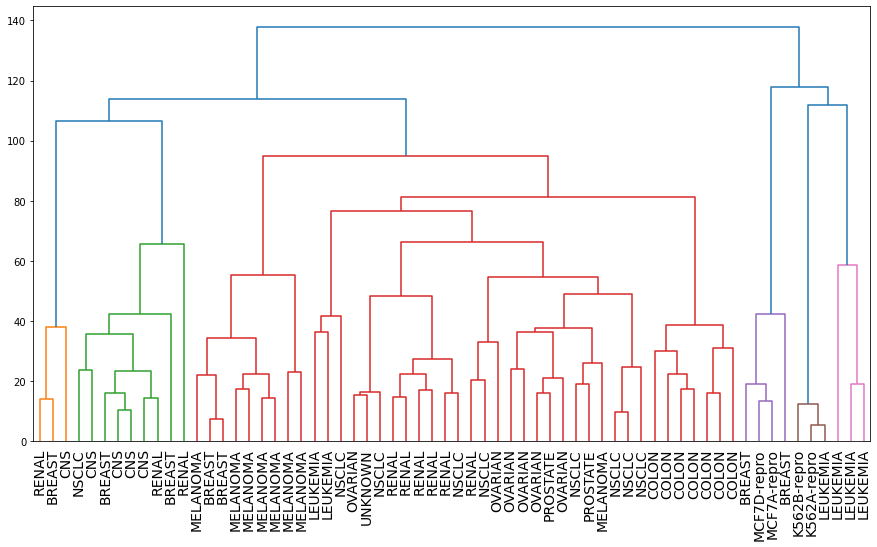

In [182]:
fig, ax = plt.subplots(1, 1, figsize = (15,8))
dendrogram(nci_hc_pca, 
           labels=labels, 
           leaf_font_size=14, 
           show_leaf_counts=True);

 Not surprisingly, these results are different from the ones that we
 obtained when we performed hierarchical clustering on the full data
 set. Sometimes performing clustering on the first few principal
 component score vectors can give better results than performing
 clustering on the full data.  In this situation, we might view the principal
component step as one of denoising the data.
We could also perform $K$-means
 clustering on the first few principal component score vectors rather
 than the full data set.





